In [1]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit

sns.set_context('talk')

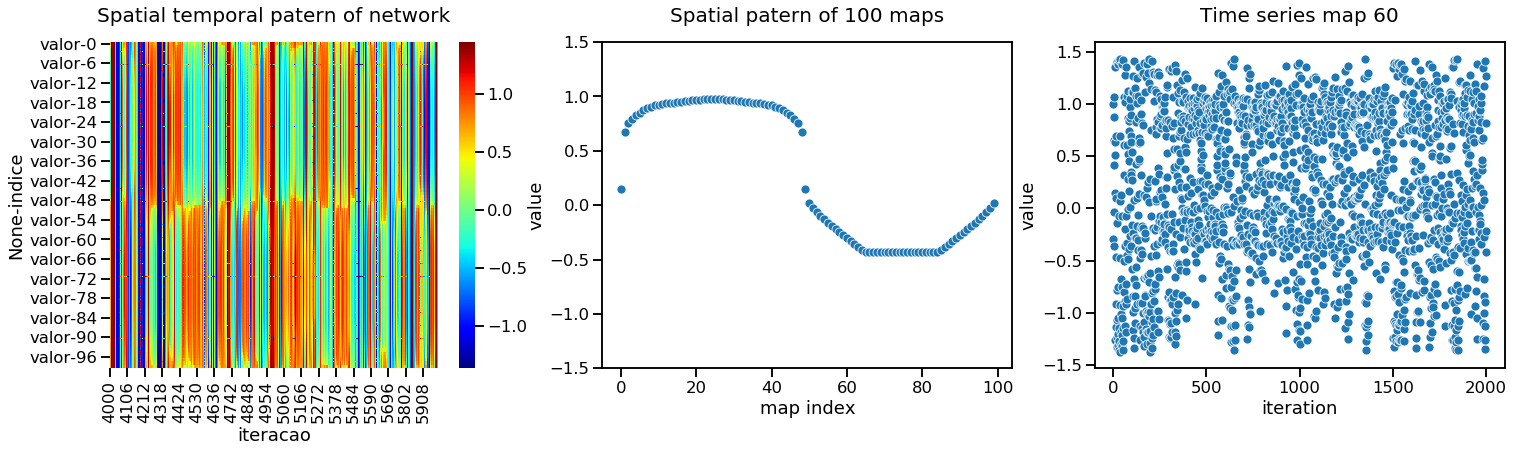

In [2]:
! gcc rulkov-global.c -o x.x -lm
! ./x.x

dado_patricio = pd.read_csv('quimera_ultimo.dat', sep=' ',
                           header=None)
dado_patricio.columns = ['indice','valor']

dado_patricio_spatial_temporal = pd.read_csv('quimera.dat', header=None, sep=' ')
dado_patricio_spatial_temporal.columns = ['indice', 'iteracao','valor']
dados_spaco_temporal = dado_patricio_spatial_temporal.pivot('iteracao','indice')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,6))

periodo = np.arange(4000,6000,2)


sns.heatmap(data = dados_spaco_temporal.loc[periodo].T,ax=ax[0], cmap='jet')
sns.scatterplot(data = dados_spaco_temporal.iloc[1602].values, ax=ax[1])
sns.scatterplot(data = dados_spaco_temporal.iloc[:,60].values, ax=ax[2])


ax[0].set_title('Spatial temporal patern of network', fontsize=20, pad=20)

ax[1].set_title('Spatial patern of 100 maps', fontsize=20, pad=20)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_ylabel('value')
ax[1].set_xlabel('map index')


ax[2].set_title('Time series map 60', fontsize=20, pad=20)
ax[2].set_ylabel('value')
ax[2].set_xlabel('iteration')


fig;
